In [1]:
import numpy as np
import pandas as pd
from   pandas import DataFrame

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Maths
import math
%matplotlib inline

In [2]:
#My path to dataset: /content/drive/MyDrive/Colab Notebooks/PAD/Datasets/Churn_Modelling.csv
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PAD/Datasets/Churn_Modelling.csv")

# First 5 rows of the dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


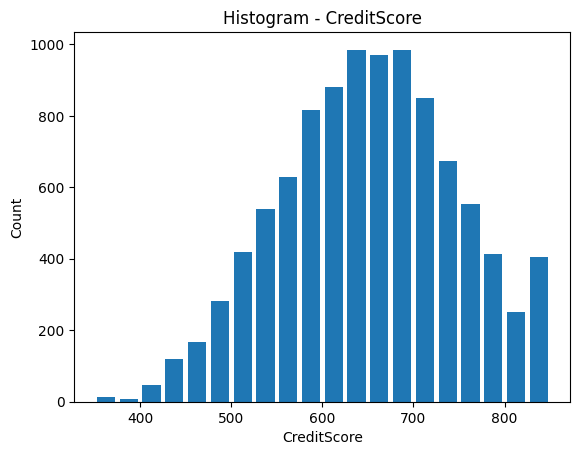

In [3]:
plt.hist(df.CreditScore, bins=20, rwidth=0.8)
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.title('Histogram - CreditScore')
plt.show()

In [4]:
inf = np.isinf(df[['CreditScore']]).values.sum()
if inf == 0:
  print("No infinity values.")
else:
  print("Infinity Values")

No infinity values.


In [5]:
cr_mean = np.nanmean(df.CreditScore.values.tolist())
cr_std = np.nanstd(df.CreditScore.values.tolist())

print("Mean Credit Score is: ", cr_mean)
print("Standard Deviation of Credit Score is: ", cr_std)

Mean Credit Score is:  650.5288
Standard Deviation of Credit Score is:  96.64846595037089


In [6]:
df['zscore_CreditScore'] = ((df.CreditScore)  - (cr_mean)) / cr_std
df[["Surname", "CreditScore", "zscore_CreditScore"]].head()

,Surname,CreditScore,zscore_CreditScore
0,Hargrave,619,-0.326221
1,Hill,608,-0.440036
2,Onio,502,-1.536794
3,Boni,699,0.501521
4,Mitchell,850,2.063884


In [17]:
# Extreme values based on credit score.
df_outlier = df[(df.zscore_CreditScore<-3) | (df.zscore_CreditScore>3)]
print(df_outlier[['CustomerId', 'Surname', 'CreditScore', 'Balance', 'EstimatedSalary', 'zscore_CreditScore']])

      CustomerId    Surname  CreditScore    Balance  EstimatedSalary  \
1405    15612494  Panicucci          359  128747.69        146955.71   
1631    15685372   Azubuike          350  152677.48        191973.49   
1838    15758813   Campbell          350  109733.20        123602.11   
1962    15692416  Aikenhead          358  143542.36        141959.11   
2473    15679249       Chou          351  163146.46        169621.69   
8723    15803202  Onyekachi          350       0.00        125823.79   
8762    15765173        Lin          350       0.00        113796.15   
9624    15668309     Maslow          350  111098.85        172321.21   

      zscore_CreditScore  
1405           -3.016383  
1631           -3.109504  
1838           -3.109504  
1962           -3.026730  
2473           -3.099157  
8723           -3.109504  
8762           -3.109504  
9624           -3.109504  
